<a href="https://colab.research.google.com/github/BijayanRay/Natural-Language-Processing-2024-CMI-course/blob/main/Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting the files

In [ ]:
# !pip install gdown
import gdown

file_id = '1PVA5IR4bAn7RulAeuSgxRBNMtmRGXaUm'
destination = '/content/pdf_json.zip'

gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1PVA5IR4bAn7RulAeuSgxRBNMtmRGXaUm
From (redirected): https://drive.google.com/uc?id=1PVA5IR4bAn7RulAeuSgxRBNMtmRGXaUm&confirm=t&uuid=77295530-670a-4030-9c48-26c1a4381bfb
To: /content/pdf_json.zip
100%|██████████| 1.00G/1.00G [00:15<00:00, 66.6MB/s]


'/content/pdf_json.zip'

In [ ]:
# %%capture
!unzip -q "/content/pdf_json.zip"

# Task 1

In [ ]:
import json
def json2text(filename):
    file = open(filename)
    paper_content = json.load(file)
    body_text = ""
    abstract = ""
    title = ""
    # Get the paper_id
    paper_id = paper_content['paper_id']
    # Get the title
    if 'title' in paper_content:
        title = paper_content['title']
    # Get the abstract
    if 'abstract' in paper_content:
        for abs in paper_content['abstract']:
            abstract += abs['text']
    # Get the body text
    if 'body_text' in paper_content:
        for bt in paper_content['body_text']:
            body_text += bt['text']
    return (f'{title} {abstract} {body_text}').lower()

In [ ]:
import os
import multiprocessing as mp
from multiprocessing import Pool

def write_file(filename):
    with open(filename, 'r') as fd:
        return json2text(filename) + " " # we are storing the texts from the json files

def par_write(files):
    '''Read a chunk of files and let the cores of your machine do the job of format conversion in parallel'''
    # Parameter: files - list of files from a folder
    cpu_count = os.cpu_count()
    p = Pool(processes=cpu_count)
    texts_data_list = p.map(write_file, files, chunksize=16)
    p.close()
    p.join()
    data = " ".join(texts_data_list)
    return data


## ?

In [ ]:
folder_path = '/content/pdf_json'
files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.json')]
texts_data = par_write(files) # this is storing all the text files from the json files separated by space

## Saving the texts in a txt file (optional)

In [ ]:
with open('/content/texts_data.txt', 'w', encoding='utf-8') as file:
  file.write(texts_data)

# Task 2

## ?
here memory overflow is happening

perhaps reading line by line from text file may help to avoid that

In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Download NLTK resources if you haven't already
import nltk
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Case folding
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove extra whitespace
    text = ' '.join(text.split())

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming (or use lemmatization if preferred)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Join tokens back to a single string
    processed_text = ' '.join(tokens)

    return processed_text

tokens = preprocess_text(texts_data)

# Task 3

## ?

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


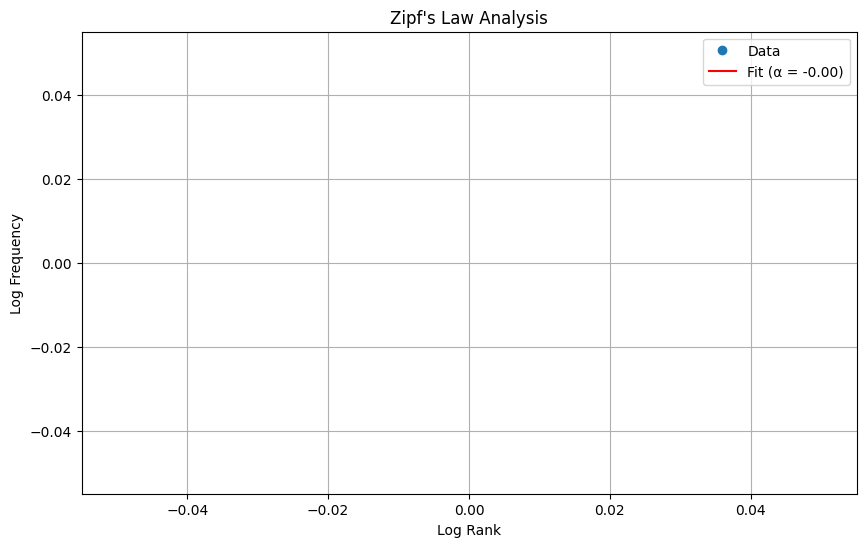

Estimated α: 0.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources if you haven't already
import nltk
nltk.download('punkt')
nltk.download('stopwords')

def term_frequency(tokens):
    # Calculate term frequency
    total_terms = len(tokens)
    term_freq = Counter(tokens)
    term_freq = {term: freq / total_terms for term, freq in term_freq.items()}
    return term_freq

def zipfs_law_analysis(term_freq):
    # Sort terms by frequency in descending order
    sorted_terms = sorted(term_freq.items(), key=lambda x: x[1], reverse=True)
    ranks = np.arange(1, len(sorted_terms) + 1)
    frequencies = np.array([freq for term, freq in sorted_terms])

    # Fit Zipf's Law: f(r) = C * r^(-α)
    log_ranks = np.log(ranks)
    log_frequencies = np.log(frequencies)

    # Perform linear regression to find α
    A = np.vstack([log_ranks, np.ones(len(log_ranks))]).T
    α, _ = np.linalg.lstsq(A, log_frequencies, rcond=None)[0]

    # Plotting for visualization
    plt.figure(figsize=(10, 6))
    plt.plot(log_ranks, log_frequencies, 'o', label='Data')
    plt.plot(log_ranks, α * log_ranks + _ , 'r-', label=f'Fit (α = {-α:.2f})')
    plt.xlabel('Log Rank')
    plt.ylabel('Log Frequency')
    plt.title('Zipf\'s Law Analysis')
    plt.legend()
    plt.grid(True)
    plt.show()

    return α

term_freq = term_frequency(tokens)
alpha = zipfs_law_analysis(term_freq)

print(f"Estimated α: {alpha:.2f}")


# Task 4

In [ ]:
vocabulary = set(tokens)

print("The number of tokens = ", len(tokens))
print("The number of vocabulary = ", len(vocabulary))
print("Vocabulary : ", vocabulary)

The number of tokens =  0
The number of vocabulary =  0
Vocabulary :  set()


# Task 5

## ?

In [ ]:
def compute_vocab_size(tokens, step=10000):
    vocab_sizes = []
    num_tokens = len(tokens)
    vocab_set = set()

    for i in range(0, num_tokens, step):
        current_tokens = tokens[:i+step]
        vocab_set.update(current_tokens)
        vocab_sizes.append((i+step, len(vocab_set)))

    return vocab_sizes

def plot_vocab_vs_tokens(vocab_sizes):
    tokens_counts, vocab_counts = zip(*vocab_sizes)

    plt.figure(figsize=(10, 6))
    plt.plot(tokens_counts, vocab_counts, marker='o', linestyle='-', color='b', label='Vocabulary Size vs. Tokens')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Number of Tokens (log scale)')
    plt.ylabel('Vocabulary Size (log scale)')
    plt.title('Heaps\' Empirical Law: Vocabulary Size vs. Number of Tokens')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()


In [ ]:
vocab_sizes = compute_vocab_size(tokens, step=10000)
plot_vocab_vs_tokens(vocab_sizes)

for num_tokens, vocab_size in vocab_sizes:
    print(f"Number of tokens: {num_tokens}, Vocabulary size: {vocab_size}")

ValueError: not enough values to unpack (expected 2, got 0)